# Data visualization with Matpotlib, Seaborn, & Nilearn (oh my!)

**Created by: Kirstie Whitaker**
<br>Adapted by: Katie Bottenhorn

**Created on: 29 July 2019**
<br>Edited on: 3 Feb 2021

From a manuscript in preparation about how the functional organization of the brain is related to IQ in a sample of FIU students taking their first physics course.

This tutorial is going to recreate a figure that presents some the brain-behavior results from our study of the relationship between brain organization and IQ.

![](https://raw.githubusercontent.com/62442katieb/NH19-Visualization/master/figures/fig4_small.png)
<br>**[Outdated]Figure 4. Post-instruction IQ and efficiency during physics reasoning.** And are there are differences with respect to students' sex and classroom environment?

### Take what you need

The philosophy of the tutorial is that I'll start by making some very simple plots, and then enhance them up to "publication standard".

You should take _only the parts you need_ and leave the rest behind.
If you don't care about fancy legends, or setting the number of minor x ticks, then you can stop before we get to that part.

The goal is to have you leave the tutorial feeling like you know _how_ to get started writing code to visualize and customise your plots.

## There are so many good resources available online!

Seaborn has a [rich gallery](https://seaborn.pydata.org/examples/index.html) with example code & data for creating a wide variety of plots.

Nilearn provides a [similar resource](http://nilearn.github.io/plotting/index.html) for making figures with brains.

## Import modules

We're importing everything up here.
And they should all be listed in the [requirements.txt](requirements.txt) file in this repository.
Checkout the [README](README.md) file for more information on installing these packages.

In [1]:
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns

from nilearn import plotting
import warnings
warnings.filterwarnings("ignore")

## The task

In this study we asked introductory physics students at FIU to lie in an fMRI scanner and complete aseries of memory and reasoning tasks.

The task we'll focus on here required students to engage in physics reasoning to answer conceptual questions about Newtonian mechanics from the Force Concept Inventory (FCI).

* The **FCI** questions (shown on the left in the figure below) showed diagrams of  

* The **control** questions (shown on the right in the figure below) were the control questions and the participants were simply asked asked perceptual questions, etc. that required little to no reasoning.

![](https://raw.githubusercontent.com/62442katieb/NH19-Visualization/master/figures/FCI-example.png)

The answers to the **FCI** question are demonstrate different conceptions about the laws of physics.

The answers to the **control** questions are pretty straightforward.

### Hypothesis
1. There is a relationship between IQ and brain organization while students are answering reasoning questions, but not while students are answering control questions.
2. These relationships are different with respect to the course type (active learning vs. lecture) in which the students were enrolled.

## With great power comes great responsibility

I've listed some hypotheses above.
We can't confirm or reject them by visualizing the data.

Just because a line _looks_ like it is going up or down, doesn't mean it is statistically significantly doing so.

You can tell many stories with a picture...including ones that mislead people very easily.

Be careful!

## The data

The data is stored in the `data/small_data.csv` file, which a subset of the variables from the larger study.

It contains a subset of variables from a much wider dataset, for ease of use.

The important columns are:

* `age_scan`
* `start_level`
* `female`
* `modeling`
* `post_phys_cpl`
* `post_ctrl_cpl`
* `head_size`
* `post_phys_fd`
* `post_ctrl_fd`
* `post_fsiq`

The first three variables are demographic information (age, year in school, and sex), the third, `modeling`, is the course type in which the student was enrolled (1: active learning class, 0: traditional lecture class).

The `post_fsiq` variable contains post-instruction IQ scores.

The `post_phys_cpl` and `post_ctrl_cpl` variable has each subject's post-instruction characteristic path length measure (describes ease of brain-wide functional integration) computed from fMRI data collected _while_ they performed the aforementioned task under FCI and control conditions.

In [2]:
# Read in the data
df = pd.read_csv('data/small_data.csv', index_col=0)

# Take a look at the first 5 rows
print ('====== Here are the first 5 rows ======')
display(df.head())

# Print all of the columns - its a big wide file 😬
print ('\n\n\n====== Here are all the columns in the file======')
display(df.columns)

# And now lets see the summary information of this subset of the data
print ('\n\n\n====== Here are some summary statistics from the columns we need ======')

display(df.describe())

====== Here are the first 5 rows ======


,post_phys_cpl,post_ctrl_cpl,post_fsiq,modeling,female,age_scan,head_size,post_phys_fd,post_ctrl_fd,start_level
101,0.010126,0.012459,99.0,0,1,20.471233,-0.226126,0.050342,0.093032,30.0
102,0.011868,0.011859,121.0,1,0,21.202740,0.697679,0.147811,0.153425,30.0
103,0.011045,0.011297,107.0,0,0,18.887671,1.298497,0.047358,0.054315,30.0
104,0.011062,0.011126,112.0,1,1,21.342466,-0.278000,0.068322,0.064685,40.0
106,0.011734,0.011355,112.0,1,0,20.378082,0.709954,0.038616,0.041502,30.0





====== Here are all the columns in the file======


Index(['post_phys_cpl', 'post_ctrl_cpl', 'post_fsiq', 'modeling', 'female',
       'age_scan', 'head_size', 'post_phys_fd', 'post_ctrl_fd', 'start_level'],
      dtype='object')




====== Here are some summary statistics from the columns we need ======


,post_phys_cpl,post_ctrl_cpl,post_fsiq,modeling,female,age_scan,head_size,post_phys_fd,post_ctrl_fd,start_level
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.011481,0.011102,117.010870,0.532609,0.456522,20.201549,0.020781,0.067854,0.066554,24.673913
std,0.001968,0.002159,12.932194,0.501669,0.500835,1.431838,0.983271,0.021153,0.022529,8.045350
min,0.007412,0.007317,86.000000,0.000000,0.000000,18.021918,-2.450336,0.034284,0.029562,10.000000
25%,0.010081,0.009297,108.000000,0.000000,0.000000,19.111644,-0.652924,0.051033,0.050515,20.000000
50%,0.011299,0.011131,118.000000,1.000000,0.000000,19.920548,-0.106503,0.063992,0.063220,20.000000
75%,0.012839,0.012334,126.250000,1.000000,1.000000,20.852740,0.700747,0.078250,0.075662,30.000000
max,0.016037,0.016990,147.000000,1.000000,1.000000,25.682192,2.682152,0.147811,0.153425,40.000000


In [3]:
# normalizing path length
df['post_phys_cpl_norm'] = (df['post_phys_cpl'] - np.mean(df['post_phys_cpl'].values))/np.std(df['post_phys_cpl'].values)
df['post_ctrl_cpl_norm'] = (df['post_ctrl_cpl'] - np.mean(df['post_ctrl_cpl'].values))/np.std(df['post_ctrl_cpl'].values)

## A quick scatter plot

The first thing we'll do is take a look at our first hypothesis: that brain organization during physics reasoning, but not during control courses, is associated with IQ.

Lets start by making a scatter plot with **IQ** on the x axis and **characteristic path length during physics reasoning** on the y axis.

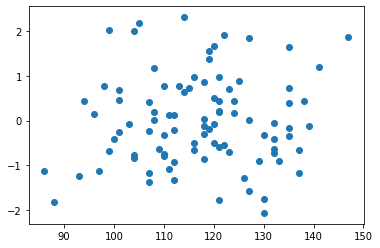

In [4]:
plt.scatter(df['post_fsiq'], df['post_phys_cpl_norm'])  # <----- A simple scatter plot

Cool, what about the relationship between IQ and path length during the control condition?

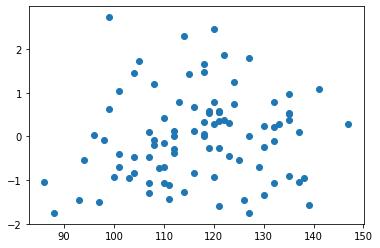

In [5]:
plt.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm']) # <----- Update to pull from a differen column

That's nice, but it would probably be more useful if we put these two on the _same_ plot.

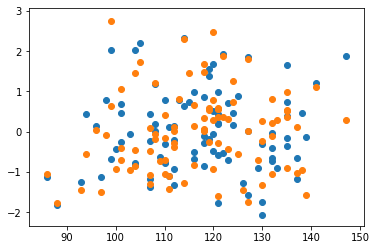

In [6]:
plt.scatter(df['post_fsiq'], df['post_phys_cpl_norm']) # <----- Both of the commands above
plt.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm']) #        on consecutive lines

Woah, that was very clever!

Matplotlib didn't make two different plots, it assumed that I would want these two plots on the same axis because they were in the same cell.

If I had called `plt.show()` inbetween the two lines above I would have ended up with two plots: 

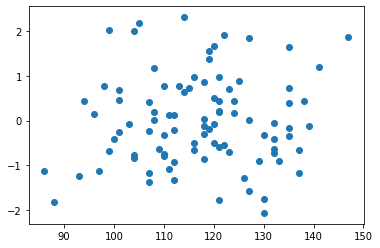

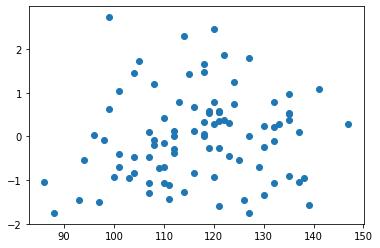

In [7]:
plt.scatter(df['post_fsiq'], df['post_phys_cpl_norm'])
plt.show() # <---------------------------------------- Show plot in the middle of the two commands
plt.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'])

## Being a little more explicit

The scatter plot above shows how easy it is to plot some data - for example to check whether you have any weird outliers or if the pattern of results generally looks the way you'd expect.

You can stop here if your goal is to explore the data ✨

But some times you'll want to have a bit more control over the plots, and for that we'll introduce the concepts of a matplotlib `figure` and an `axis`.

To be honest, we aren't really going to introduce them properly because that's a deeeeeep dive into the matplotlib object-orientated architecture.
There's a nice tutorial at [https://matplotlib.org/users/artists.html](https://matplotlib.org/users/artists.html), but all you need to know is that a **figure** is a figure - the canvas on which you'll make your beautiful visualisation - and it can contain multiple **axes** displaying different aspects or types of data.

In fact, that makes it a little easier to understand why the way that many people create a figure and an axis is to use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) command.
(And here's a [stack overflow answer](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python) which explains it in a little more depth.)

If you run the command all by itself, you'll make an empty axis which takes up the whole figure area:

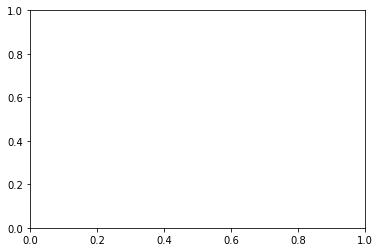

In [8]:
fig, ax = plt.subplots() # <--------- A simple set up

Lets add our plots to a figure:

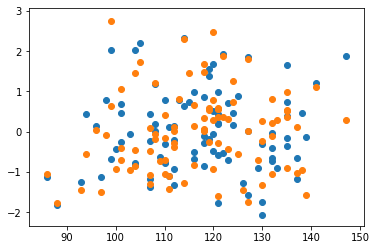

In [9]:
fig, ax = plt.subplots() # <------------------------------- A simple set up
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm']) # <------- The commands above
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'])
plt.show()

Did you see that this time we changed `plt.scatter` to `ax.scatter`? 

That's because we're being more specific about _where_ we want the data to be plotted.
Specifically, we want it on the first (only) axis in our figure.

We also got explicit about telling jupyter to show the plot with `plt.show()`.
You don't need this, but its good practice for when you start coding lots of plots all in one go and don't want them to all appear on the same axis 😂

In [10]:
df = df.sort_values(by='post_fsiq', axis=0)

## Let's add a regression line

I used [`statsmodels`](https://www.statsmodels.org/stable/index.html) to fit the model and to get the predicted values. 

I'm gonna throw a few more variables in the mix, too, to make sure our differences in topology aren't related to head motion or head and IQ isn't confounded by head size.

In [23]:
# FCI
formula_phys = 'post_phys_cpl_norm ~ post_fsiq'
mod_phys = ols(formula=formula_phys, data=df)
results_phys = mod_phys.fit()
print(results_phys.summary())
predicted_phys = results_phys.predict()
print('\nPredicted Y, physics:\n', predicted_phys)

# Control
formula_ctrl = 'post_ctrl_cpl_norm ~ post_fsiq'
mod_ctrl = ols(formula=formula_ctrl, data=df)
results_ctrl = mod_ctrl.fit()
print(results_ctrl.summary())
predicted_ctrl = results_ctrl.predict()
print('\nPredicted Y, control:\n', predicted_ctrl)

                            OLS Regression Results                            
Dep. Variable:     post_phys_cpl_norm   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4612
Date:                Mon, 01 Feb 2021   Prob (F-statistic):              0.499
Time:                        22:17:50   Log-Likelihood:                -130.31
No. Observations:                  92   AIC:                             264.6
Df Residuals:                      90   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6496      0.962     -0.675      0.5

Lets plot that modelled pattern on our scatter plot. But with added regression lines! And for that, we'll use `ax.plot` instead of `ax.scatter`, and the good 'ol `y = mx + b`.

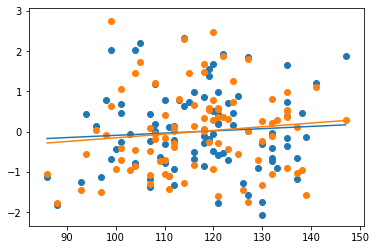

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'])
ax.plot(df['post_fsiq'], predicted_phys)
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'])
ax.plot(df['post_fsiq'], predicted_ctrl)
plt.show()

That looks fine, but the lines are a little thin... let's bump things up.

In [25]:
df['pred_phys_cpl'] = predicted_phys
df['pred_ctrl_cpl'] = predicted_ctrl

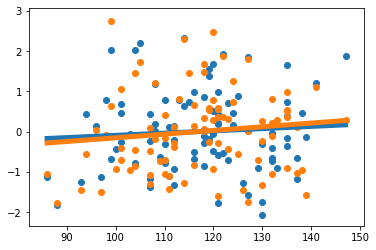

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'])
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'])
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5) # <----- Add linewidth arguement
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5) # <----- Add linewidth arguement
plt.show()

## Add a legend

These two lines aren't labelled!
We don't know which one is which.

So lets add a legend to the plot.

The function is called `ax.legend()` and we don't tell it the labels directly, we actually add those as _attributes_ of the scatter plots by adding `label`s.

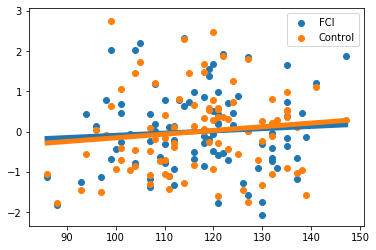

In [27]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5)
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5)
ax.legend() # <------- Add legend
plt.show()

Except I don't want the lines labeled, because that's redundant.

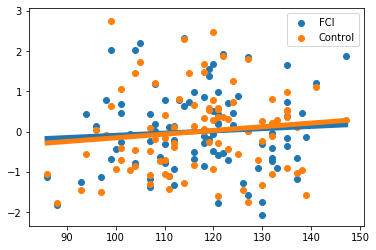

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='')
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='') # <------- Add empty label
ax.legend()
plt.show()

Woah! The label moved!

The legend positioning is very clever, matplotlib has put it in the location with the fewest dots, which changed based on its size!

Here's the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) that shows you how to be explicit about where to put the legend.
The default value for `loc` is `best`, and we can happily keep that for the rest of this notebook.

If you really wanted to put it somewhere else, you can set the location explicitly.
For example, in the center on the right hand side.

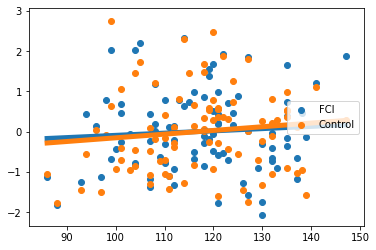

In [34]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='')
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='')
ax.legend(loc='center right') # <-------- Move the legend
plt.show()

Oof, that's terrible.

Where's a good place to put it?

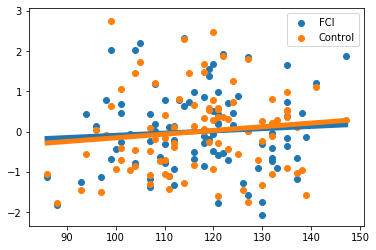

In [35]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='')
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='')
ax.legend(loc='best')
plt.show()

## Change the colors

The fact that our physics reasoning data (dots) and regression line are both blue, and that the control data are both orange, is a consequence of the order in which we've asked matplotlib to plot the data.

At the moment, matplotlib is coloring the first scatter plot with its first default color, and the second with the second default color.

Then when we give it a different type of plot (`plot` vs `scatter`) it starts the color cycle again.
(You can see the order of the colours in the [documentation of when they were introduced](https://matplotlib.org/3.1.1/users/dflt_style_changes.html#colors-in-default-property-cycle).)

If we move the order of the two regression lines the colours will change:

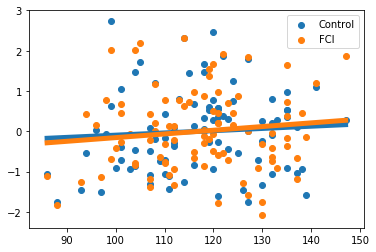

In [36]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='')
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='') # <----- switched the order of phys & ctrl
ax.legend(loc='best')
plt.show()

So that's no good!

Let's explicitly set the colors.

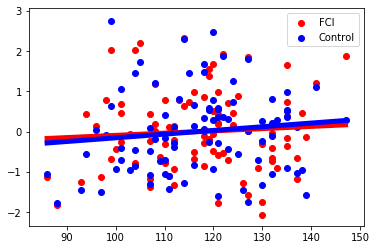

In [37]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'],
           label = 'Physics', color = 'red') # <--------- Add the color
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'],
           label = 'Control', color = 'blue') # <--------- Add the color
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='', color='red')
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='', color='blue')
ax.legend(loc='best')
plt.show()

Cool....the colours are fixed....but wow those aren't nice to look at 😕

# Introducing Seaborn!
[Seaborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
It provides a high-level interface for drawing attractive and informative statistical graphics.

It does many beautiful things (a few of which we're going to explore) but it can sometimes be so clever that it becomes a little opaque.

If in doubt, remember that seaborn will almost always return an `axis` object for you, and you can change those settings just as you would in matplotlib.

In fact, all that work we just did with matplot lib could be done _very_ simply with Seaborn's `regplot`.

In [38]:
import seaborn as sns

## Color management with Seaborn

One of the very nice things that seaborn does is manage colors easily.

The red and blue that I used in the published figure came from the ["Set1" Brewer color map](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=5).

We can get the RGB values for the colors in this qualitative color map from seaborn's `color_palette` function, and visualize them using the "palette plot" (`palplot`) function.

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(0.30196078431372547, 0.6862745098039216, 0.2901960784313726)
(0.596078431372549, 0.3058823529411765, 0.6392156862745098)
(1.0, 0.4980392156862745, 0.0)


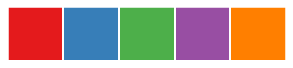

In [43]:
color_list = sns.color_palette("Set1", n_colors=5)

for color in color_list:
    print(color)

sns.palplot(color_list)

Ok, now that we have our much nicer colors, let's change the red and blue in our accuracy plot.

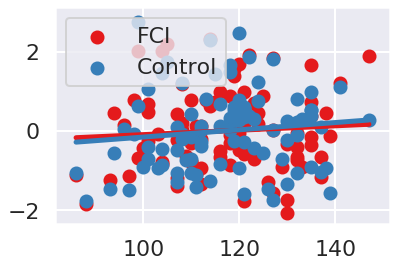

In [44]:
fig, ax = plt.subplots()
ax.scatter(df['post_fsiq'], df['post_phys_cpl_norm'],
           label = 'Physics', color = color_list[0]) # <--------- Update color
ax.scatter(df['post_fsiq'], df['post_ctrl_cpl_norm'],
           label = 'Control', color = color_list[1]) # <---------- Update color
ax.plot(df['post_fsiq'], 
        df['pred_phys_cpl'], 
        linewidth = 5, label='', color = color_list[0]) # <----------------- Update color
ax.plot(df['post_fsiq'], 
        df['pred_ctrl_cpl'], 
        linewidth = 5, label='', color = color_list[1]) # <----------------- Update color

ax.legend(loc='best')
plt.show()

But, wait! There's more! Seaborn makes pretty plots, we can use the `reglplot()` function to replace the `scatter()` and `plot()` above!

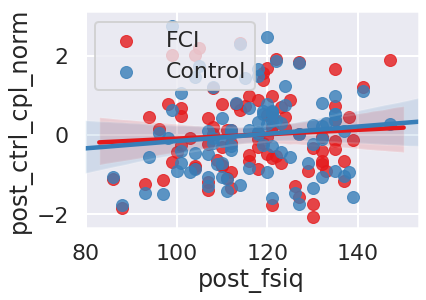

In [45]:
fig,ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics', color = color_list[0])
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control', color = color_list[1])
ax.legend(loc='best')
plt.show()

## Really jazzing up the plot with seaborn

1. I don't like those colors and I really liked the Seaborn `regplot` more than these matplotlib plots.
2. Seaborn has _so many_ cooler color options. Even if we stick with red & blue (see: [crayon_palette](https://seaborn.pydata.org/generated/seaborn.crayon_palette.html#seaborn.crayon_palette)).
3. Another other two really beautiful things that seaborn can do is set the **context** of the plot, and the figure **style**.

There are lots of great examples in the [aesthetics tutorial](https://seaborn.pydata.org/tutorial/aesthetics.html) which I really encourage you to have a play around with.

Let's check out the `poster` context, with a `darkgrid` background.

In [46]:
sns.set_context("poster", font_scale=1)
sns.set_style('darkgrid')
sns.set_palette(color_list) # <--- now we don't have to manually set colors anymore

Now that we've run the code above, lets re-make our scatter plot:

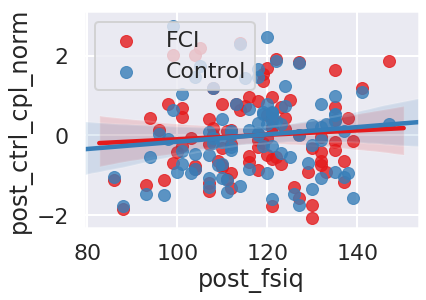

In [47]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.legend(loc='best')
plt.show()

Wowzers trousers. 
That's no good 😬

How about `notebook` context with a `ticks` background?

In [50]:
sns.set_context("notebook", font_scale=1)
sns.set_style('ticks')

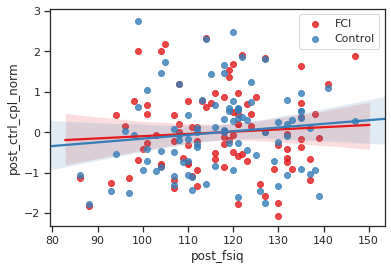

In [51]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.legend(loc='best')
plt.show()

Fun, we've got back to the matplotlib default!

I think my favorite style setting is `notebook` context with a `font_scale` of 1.5 and the `whitegrid` style.

In [52]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style('whitegrid')

And I'm picky about colors. Luckily, Seaborn's got [options](https://seaborn.pydata.org/tutorial/color_palettes.html). Two of my favorite color paletting options are `crayon_palette` and `husl_palette`. 

You can use Crayola crayon names to make a palette:

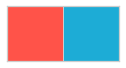

In [54]:
crayola = sns.crayon_palette(['Red Orange', 'Cerulean'])
sns.palplot(crayola)

In [55]:
sns.set_palette(crayola)

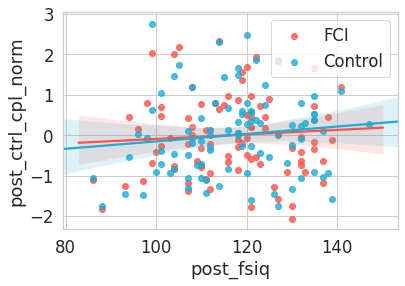

In [56]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.legend(loc='best')
plt.show()

When you run the `set_context` and `set_style` commands they become global settings for all plots that you subsequently make in the same notebook (or script).

Personally I load them in at the top of all my notebooks because I think they make the plots look nicer 💁‍♀️

Oh, and I like the plots [despined](https://seaborn.pydata.org/tutorial/aesthetics.html#removing-axes-spines) too, so lets do that real quick:

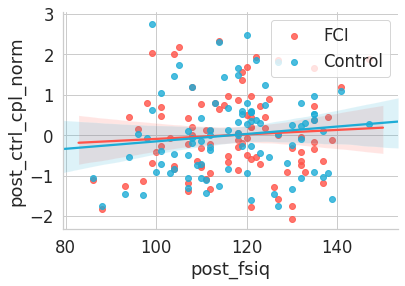

In [57]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.legend(loc='best')
sns.despine() # <------------------ Despine the plot
plt.show()

## Axis labels, limits and tick placement

### Labels

Our plots have ugly axis labels!
Nobody should have to interpret our ugly variable names.

Let's go ahead and label them 😸

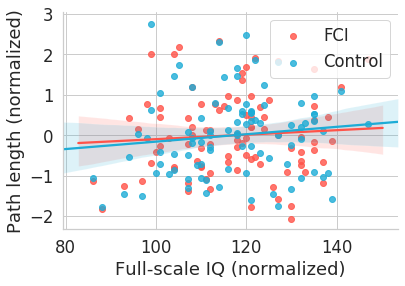

In [59]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.set_xlabel('Full-scale IQ (normalized)') # <--------------- Set x axis label
ax.set_ylabel('Path length (normalized)') # <--------- Set y axis label
ax.legend(loc='best')
sns.despine()
plt.show()

### Limits

One of the things that's really nice to do is to be able to set the min and max values for a figure.

At the moment, matplotlib is guessing at a good place to start and stop the axes.
And it's doing a great job...but what if you wanted to show a subset of the data?
If the minimum or maxium age or reaction time values were different then you'd end up with slightly different dimensions on the x and y axes.

Let's see what it's guessing:

X min and max: 79.46, 153.54
Y min and max: -2.32, 3.05


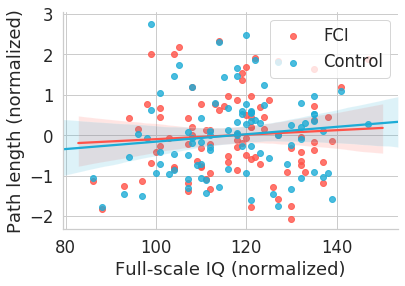

In [60]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
print ('X min and max: {:2.2f}, {:2.2f}'.format(*ax.get_xlim())) # <------ Print x axis limits
print ('Y min and max: {:2.2f}, {:2.2f}'.format(*ax.get_ylim())) # <------ Print y axis limits
ax.set_xlabel('Full-scale IQ (normalized)') # <--------------- Set x axis label
ax.set_ylabel('Path length (normalized)')
ax.legend(loc='best')
sns.despine()
plt.show()

### Tick placement

Seaborn and matplotlib have made a good guess at where to put the x and y ticks, and in this case, the ticks work.

But for the sake of illustration, let's shake things up.

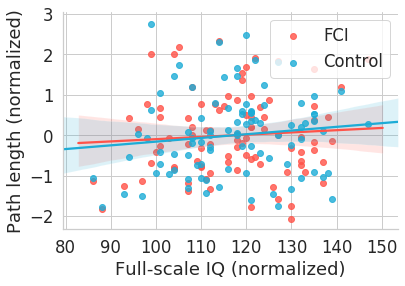

In [61]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.set_xticks([80, 90, 100, 110, 120, 130, 140, 150]) # <----------------------- Set x tick positions 
ax.set_xlabel('Full-scale IQ (normalized)') # <--------------- Set x axis label
ax.set_ylabel('Path length (normalized)')
ax.legend(loc='best')
sns.despine()
plt.show()

Yeah, that looks a little busy. But now you know!

For the y ticks we can use the ticker `locator_params` to put them in the best place for getting a maximum of 6 ticks.

This is basically what matplotlib is already doing, but I'll show you the command just in case you want to use it in the future.

For example, if you wanted to force the plot to have 4 bins, you'd set `nbins` to 4:

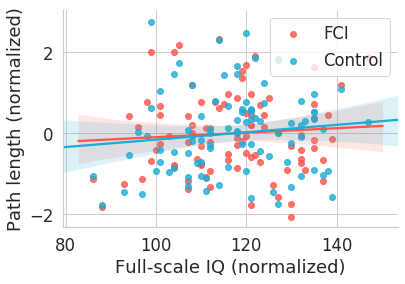

In [62]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.locator_params(nbins=4, axis='y') # <----------------------- Set y tick positions 
ax.set_xlabel('Full-scale IQ (normalized)') # <--------------- Set x axis label
ax.set_ylabel('Path length (normalized)')
ax.legend(loc='best')
sns.despine()
plt.show()

And note that even when we set `nbins` to 6 (as I wrote in the original figure code), it actually only gives us 5 ticks, because matplotlib - correctly - can't find a sensible way to parse the range to give us 6 evenly spaced ticks on they y axis.

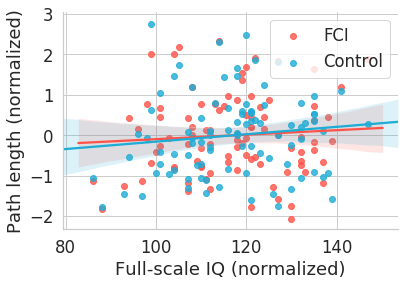

In [63]:
fig, ax = plt.subplots()
sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics')
sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control')
ax.locator_params(nbins=6, axis='y') # <----------------------- Set y tick positions 
ax.set_xlabel('Full-scale IQ (normalized)')
ax.set_ylabel('Path length (normalized)')
ax.legend(loc='best')
sns.despine()
plt.show()

One quick point to remember here: the x and y axis **limits** are not the same as the **tick locations**.
The limits are the edges of the plot.
The tick locations are where the markers sit on the axes.

## Remember our second hypothesis, though?

A second hypothesis that these relationships between the brain & IQ are different with respect to the course type (active learning vs. lecture) in which the students were enrolled.

Let's beef up our regressions...

In [65]:
# FCI
formula_phys = '''post_phys_cpl_norm ~ 
                    post_fsiq + post_fsiq * modeling + post_fsiq * female + 
                    post_fsiq * female * modeling + female * modeling + 
                    head_size + post_phys_fd + age_scan + start_level'''
mod_phys = ols(formula=formula_phys, data=df)
results_phys = mod_phys.fit()
print(results_phys.summary())

# Control
formula_ctrl = '''post_ctrl_cpl_norm ~ 
                    post_fsiq + post_fsiq * modeling + post_fsiq * female + 
                    post_fsiq * female * modeling + female * modeling + 
                    head_size + post_ctrl_fd + age_scan + start_level'''
mod_ctrl = ols(formula=formula_ctrl, data=df)
results_ctrl = mod_ctrl.fit()
print(results_ctrl.summary())

                            OLS Regression Results                            
Dep. Variable:     post_phys_cpl_norm   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.974
Date:                Mon, 01 Feb 2021   Prob (F-statistic):            0.00235
Time:                        22:25:46   Log-Likelihood:                -114.77
No. Observations:                  92   AIC:                             253.5
Df Residuals:                      80   BIC:                             283.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Using `plt.subplots`, we can actually add panels (or subplots) to a single figure. I'm going to separate FCI and control conditions so we can dive into class effects.

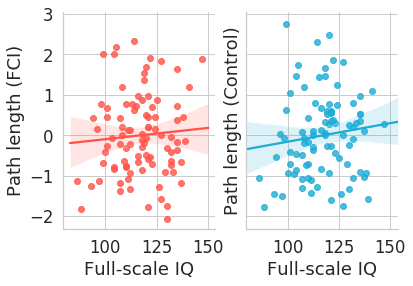

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)
g = sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics', ax=ax[0])
h = sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control', ax=ax[1])

g.set_xlabel('Full-scale IQ') 
g.set_ylabel('Path length (FCI)')
h.set_xlabel('Full-scale IQ') 
h.set_ylabel('Path length (Control)')
sns.despine()
plt.show()

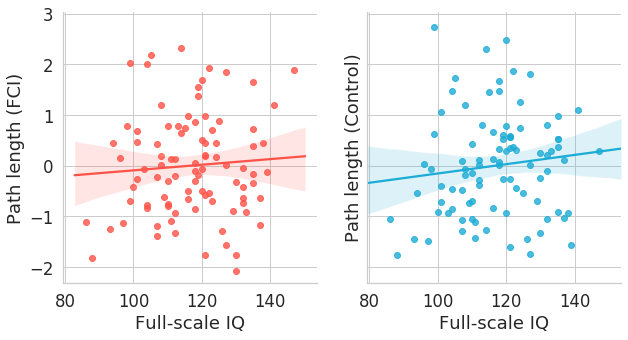

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(10,5)) # Make it  bigger
g = sns.regplot(df['post_fsiq'], df['post_phys_cpl_norm'], label = 'Physics', ax=ax[0])
h = sns.regplot(df['post_fsiq'], df['post_ctrl_cpl_norm'], label = 'Control', ax=ax[1])

g.set_xlabel('Full-scale IQ') 
g.set_ylabel('Path length (FCI)')
h.set_xlabel('Full-scale IQ') 
h.set_ylabel('Path length (Control)')
sns.despine()
plt.show()

🚀🌟🚀🌟🚀🌟🚀🌟🚀🌟🚀🌟

Fantastic!
We've made a two-panel plot!
Just like that.

Seaborn has really neat ways to make multi-paneled plots, though. So we're going to switch from `regplot` to `lmplot`, which further simplifies our code.

However, seaborn handles data a little differently. What we have right now is _wide_ data, with lots of columns and only one row per participant. Some Seaborn functions want _long_ data, which can get a little tricky...

In [68]:
df.head()

,post_phys_cpl,post_ctrl_cpl,post_fsiq,modeling,female,age_scan,head_size,post_phys_fd,post_ctrl_fd,start_level,post_phys_cpl_norm,post_ctrl_cpl_norm,pred_phys_cpl,pred_ctrl_cpl
320,0.009289,0.008841,86.0,0,1,24.542470,-1.450642,0.076378,0.093336,30.0,-1.119675,-1.052959,-0.172156,-0.283849
584,0.007893,0.007317,88.0,1,1,20.479452,-2.098277,0.046344,0.043236,30.0,-1.832911,-1.762583,-0.161053,-0.265542
107,0.009038,0.007979,93.0,0,1,19.772603,-1.039967,0.059676,0.057199,30.0,-1.247903,-1.454355,-0.133295,-0.219776
334,0.012345,0.009929,94.0,1,0,20.147945,1.019913,0.060498,0.056966,20.0,0.441385,-0.545968,-0.127744,-0.210623
571,0.011772,0.011181,96.0,1,0,20.402740,-0.253465,0.066068,0.068301,30.0,0.148807,0.036781,-0.116641,-0.192317


We can make our data long by just manipulating this dataframe a bit. 

Manipulating dataframes is a little tricky, but a valuable skill that you'll end up using much more frequently than you'd like to admit...

In [69]:
df_long = df.melt(id_vars=['modeling', 'female', 'post_fsiq'], value_vars=['post_phys_cpl_norm', 'post_ctrl_cpl_norm'],
                 var_name='condition')
df_long.replace(to_replace='post_phys_cpl_norm', value='Physics', inplace=True)
df_long.replace(to_replace='post_ctrl_cpl_norm', value='Control', inplace=True)

df_long.head()

,modeling,female,post_fsiq,condition,value
0,0,1,86.0,FCI,-1.119675
1,1,1,88.0,FCI,-1.832911
2,0,1,93.0,FCI,-1.247903
3,1,0,94.0,FCI,0.441385
4,1,0,96.0,FCI,0.148807


And now we're replacing `1` and `0` in our `modeling` and `female` variables, because we're done running stats, now we're just on to visualizing. 

In [70]:
df_long.replace({'modeling':{0: 'Lecture', 1:'Active'}, 
                 'female': {0: 'Male', 1: 'Female'}}, inplace=True)
df_long.rename({'modeling': 'Class type',
                'female': 'Sex'}, axis=1, inplace=True)
df_long.head()

,Class type,Sex,post_fsiq,condition,value
0,Lecture,Female,86.0,FCI,-1.119675
1,Active,Female,88.0,FCI,-1.832911
2,Lecture,Female,93.0,FCI,-1.247903
3,Active,Male,94.0,FCI,0.441385
4,Active,Male,96.0,FCI,0.148807


Using `lmplot` instead of `regplot`, we'll plot our two conditions (FCI, Control) next to each other in one figure in only one line of code! 😱<br><br>While `regplot()` and `lmplot()` are closely related functions, the former is an axes-level function while the latter is a figure-level function that combines `regplot()` and `FacetGrid`.

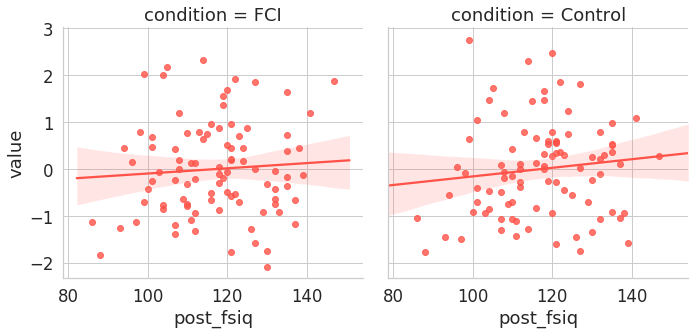

In [73]:
sns.lmplot('post_fsiq', 'value', df_long, col='condition')
plt.show()

Now let's see what the relationships between path length and IQ look like during fci and control conditions in the two separate classes using the `hue` flag, which separates data by color along the categorical variable specified (`'Class type'`, in this case).

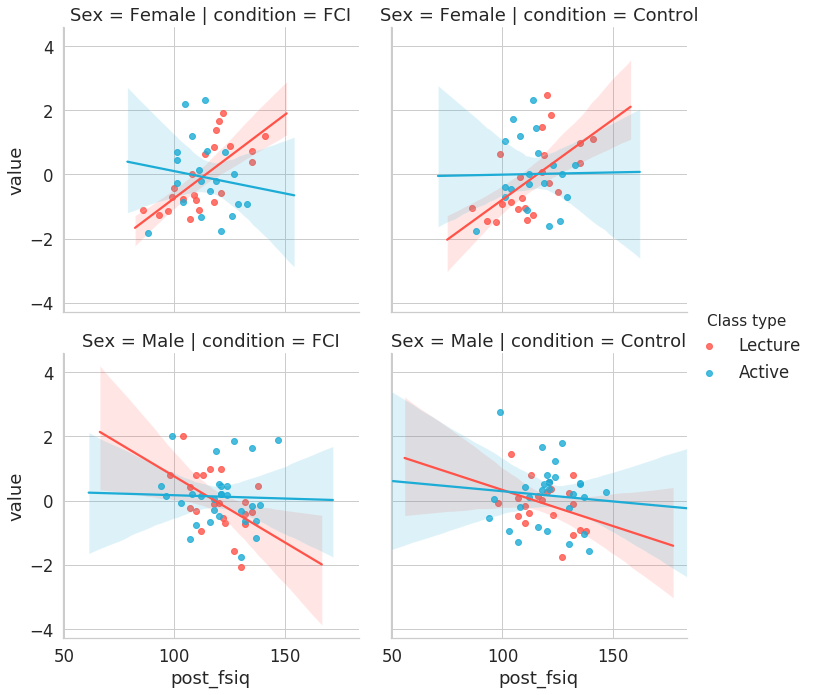

In [74]:
sns.lmplot('post_fsiq', 'value', df_long, col='condition', row='Sex', hue='Class type')
plt.show()

That's all well and good, but the spacing and the axes are a little off. That's because `lmplot` and other Seaborn grid plots wrap the `fig,ax = plt.subplots()` line we had been including, and they have their own defaults. Let's adjust some of these defaults...

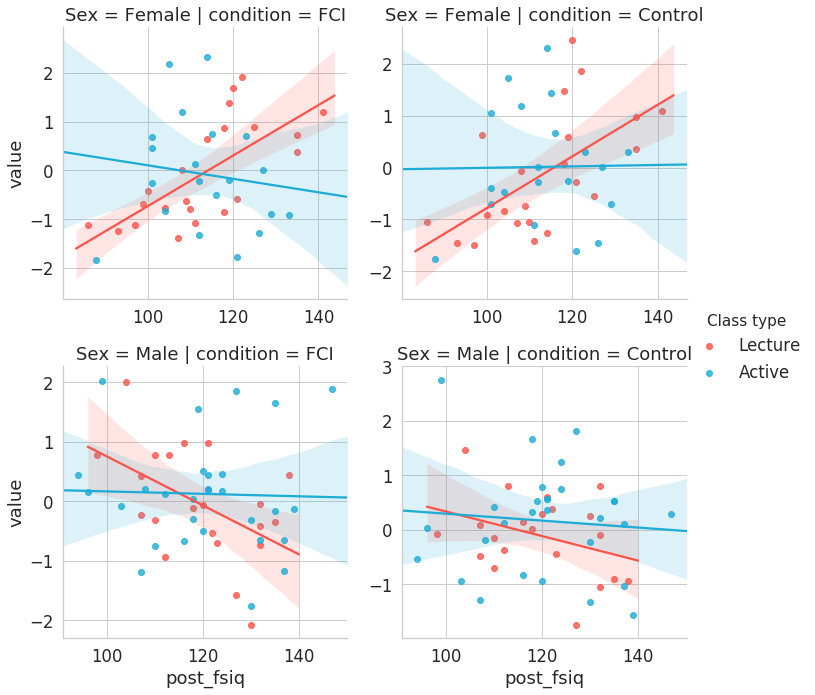

In [75]:
sns.lmplot('post_fsiq', 'value', df_long, col='condition', hue='Class type', row='Sex',
           sharex=False, sharey=False) # <---- now we're not constraining the axes
plt.show()

And let's fix the labels again. It's a little trickier, now, because we're not directly manipulating the axes, we're manipulating an object that contains the axes. This means instead of `ax.set_ylabel` and `ax.set_xlabel`, we have to use the functions associated with `lmplot()`. In this case, these are `set_titles()` and `set_axis_labels`, which are pretty self-explanatory.

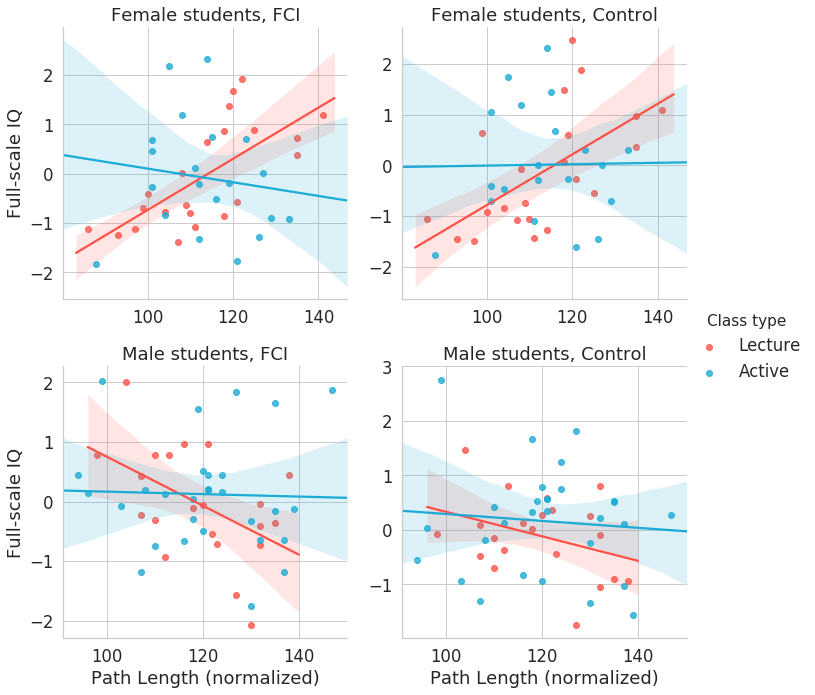

In [76]:
j = sns.lmplot('post_fsiq', 'value', df_long, col='condition', hue='Class type', row='Sex',
               sharex=False, sharey=False)
j.set_titles(template='{row_name} students, {col_name}')
j.set_axis_labels('Path Length (normalized)', 'Full-scale IQ')
plt.show()

And, dear friends, what good would making all these pretty plots be if we couldn't save them?

In [77]:
j.savefig('figures/finished_fig.png', dpi=300) #<---- can also save as an .svg, if you like vectors

Seaborn has many more options for plotting, and very helpful galleries & tutorials for creating beautiful & descriptive plots.<br>

<p>
    <h3>Distributions and kernel density plots</h3>
    <img src="https://seaborn.pydata.org/_images/kde_ridgeplot.png" style="height: 200px; float: left;"/>
    <img src="https://seaborn.pydata.org/_images/histogram_stacked.png" style="height: 200px; float: left;" display="block"/>
    <img src="https://seaborn.pydata.org/_images/palette_generation.png" style="height: 200px; float: left;"display="block"/>
</p>
<br><br><br><br><br><br><br><br><br><br>
<p>
    <h3>Line plots (with error bands!)</h3>
    <img src="https://seaborn.pydata.org/_images/errorband_lineplots.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/wide_data_lineplot.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/timeseries_facets.png" style="height: 200px;" align="left"/>
</p>
<br><br><br><br><br><br><br><br><br><br>
<p>
    <h3>Box, swarm, and violin/rainfall plots</h3>
    <img src="https://seaborn.pydata.org/_images/grouped_boxplot.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/scatterplot_categorical.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/grouped_violinplots.png" style="height: 200px;" align="left"/>
</p>
<br><br><br><br><br><br><br><br><br><br>
<p>
    <h3>Radial plots!</h3><br>
    <img src="https://seaborn.pydata.org/_images/radial_facets.png" style="height: 200px;" align="left"/>
</p>
<br><br><br><br><br><br><br><br><br><br>
<p>
    <h3>And heatmaps!</h3><br>
    <img src="https://seaborn.pydata.org/_images/many_pairwise_correlations.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/spreadsheet_heatmap.png" style="height: 200px;" align="left"/>
    <img src="https://seaborn.pydata.org/_images/structured_heatmap.png" style="height: 200px;" align="left"/>
</p>

## Brain plot?

We've talked a lot about brains, but... all I've made are scatter plots?

You can spend as much time making brain plots as I just have making scatter plots. I'm just going to show you one two that make brain slices and surfaces, respectively, but there's a whole gallery of different options available from [nilearn](http://nilearn.github.io/plotting/index.html), which has a while module of `plotting` functions.

In [78]:
from nilearn import plotting

### Nilearn's basic plotting functions (for displaying results) are:
- `plot_anat()`: plots structural/T1w images
- `plot_epi()`: plots functional/epi images
- `plot_stat_map()`: plots statistical images on a structural template
- `plot_glass_brain()`: plots statistical images on a glass brain template
- `plot_connectome()`: plots connectivity between brain regions on a glass brain

Nilearn has a lot of good, good data you can import directly into a jupyter notebook or python script. We're going to use the `fetch_haxby()` function to grab a block-design fMRI dataset from a study on face and object representation in human ventral temporal cortex.

You can also use local files in any of these plotting functions by just using the file path as an argument, which is just so convenient.

In [79]:
from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]


Dataset created in /home/jovyan/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (5 seconds, 0 min)
Extracting data from /home/jovyan/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


First subject anatomical nifti image (3D) is at: /home/jovyan/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /home/jovyan/nilearn_data/haxby2001/subj2/bold.nii.gz

Dataset created in /home/jovyan/nilearn_data/neurovault



We can visualize results from a motor task used with this dataset either on an MNI template brain or on a glass brain: 

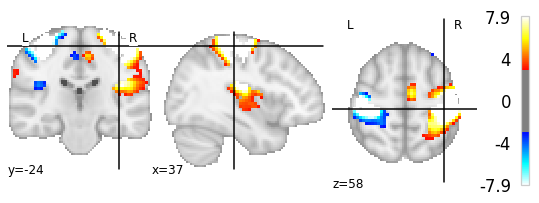

In [80]:
plotting.plot_stat_map(stat_img, threshold=3)

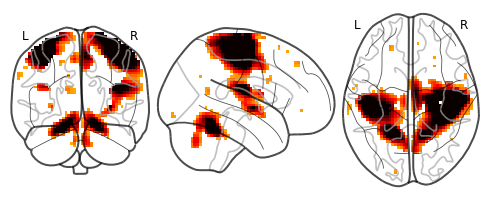

In [81]:
plotting.plot_glass_brain(stat_img, threshold=3)

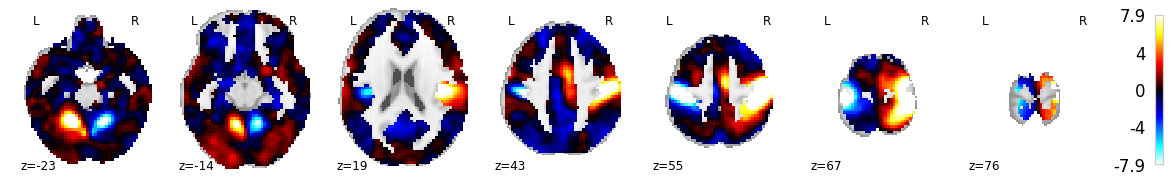

In [82]:
plotting.plot_stat_map(stat_img, display_mode='z') # <---- change display mode, cut coodinates, # slices

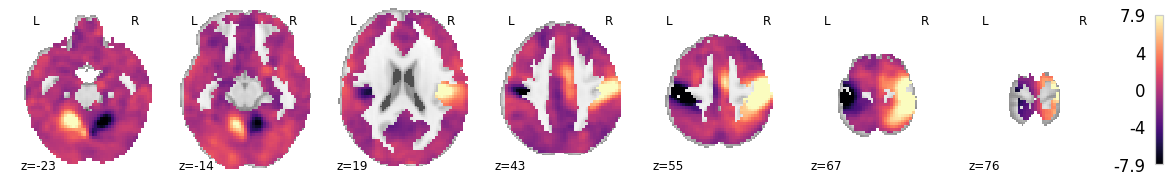

In [83]:
plotting.plot_stat_map(stat_img, display_mode='z', cmap='magma') # <---- change colors!

But I really like visualizing things on brain surfaces. Nilearn's got a function for that!

First, we need a brain surface model. I'm going to grab Freesurfer's average surface and an example statistical map. 

In [85]:
fsaverage = datasets.fetch_surf_fsaverage()
stat_img = motor_images.images[0]

Now we'll resample these stats results to this surface.

In [86]:
from nilearn import surface

texture = surface.vol_to_surf(stat_img, fsaverage.pial_right)

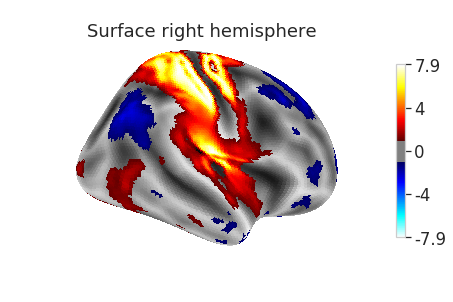

In [87]:
k = plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere', colorbar=True,
                            bg_map=fsaverage.sulc_right, threshold=1.)
k.show()

Let's compare to a plot of slices?

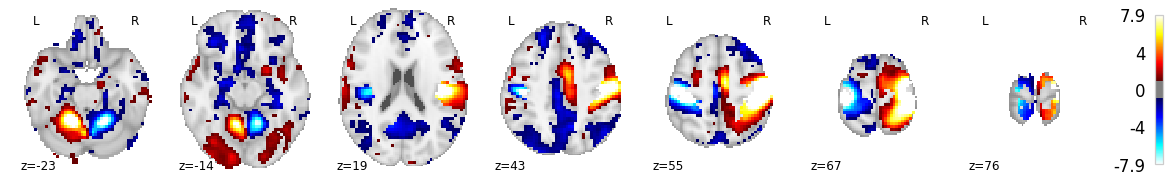

In [88]:
l = plotting.plot_stat_map(stat_img, display_mode='z', threshold=1.)

And, finally, you can use Nilearn's `plotting.view_surf()` for an interactive, surface-based figure!

In [89]:
view = plotting.view_surf(fsaverage.infl_right, texture, threshold='90%',
                          bg_map=fsaverage.sulc_right)
view

The end. Well done 💖